In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

In [7]:
df = pd.read_json('data/data.json')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [10]:
df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state',
       'Target'],
      dtype='object')

In [15]:
for c in df[:1]:
    print (df[c])

0        fraudster_event
1                premium
2                premium
3                premium
4                premium
5                premium
6                premium
7                premium
8                premium
9                premium
10               premium
11               premium
12               premium
13          spammer_warn
14               premium
15               premium
16               premium
17               premium
18               premium
19               premium
20               premium
21               premium
22               premium
23               premium
24               premium
25               premium
26             fraudster
27               premium
28               premium
29               premium
              ...       
14307            premium
14308            premium
14309            premium
14310            premium
14311            premium
14312            premium
14313            premium
14314            premium
14315            premium


/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


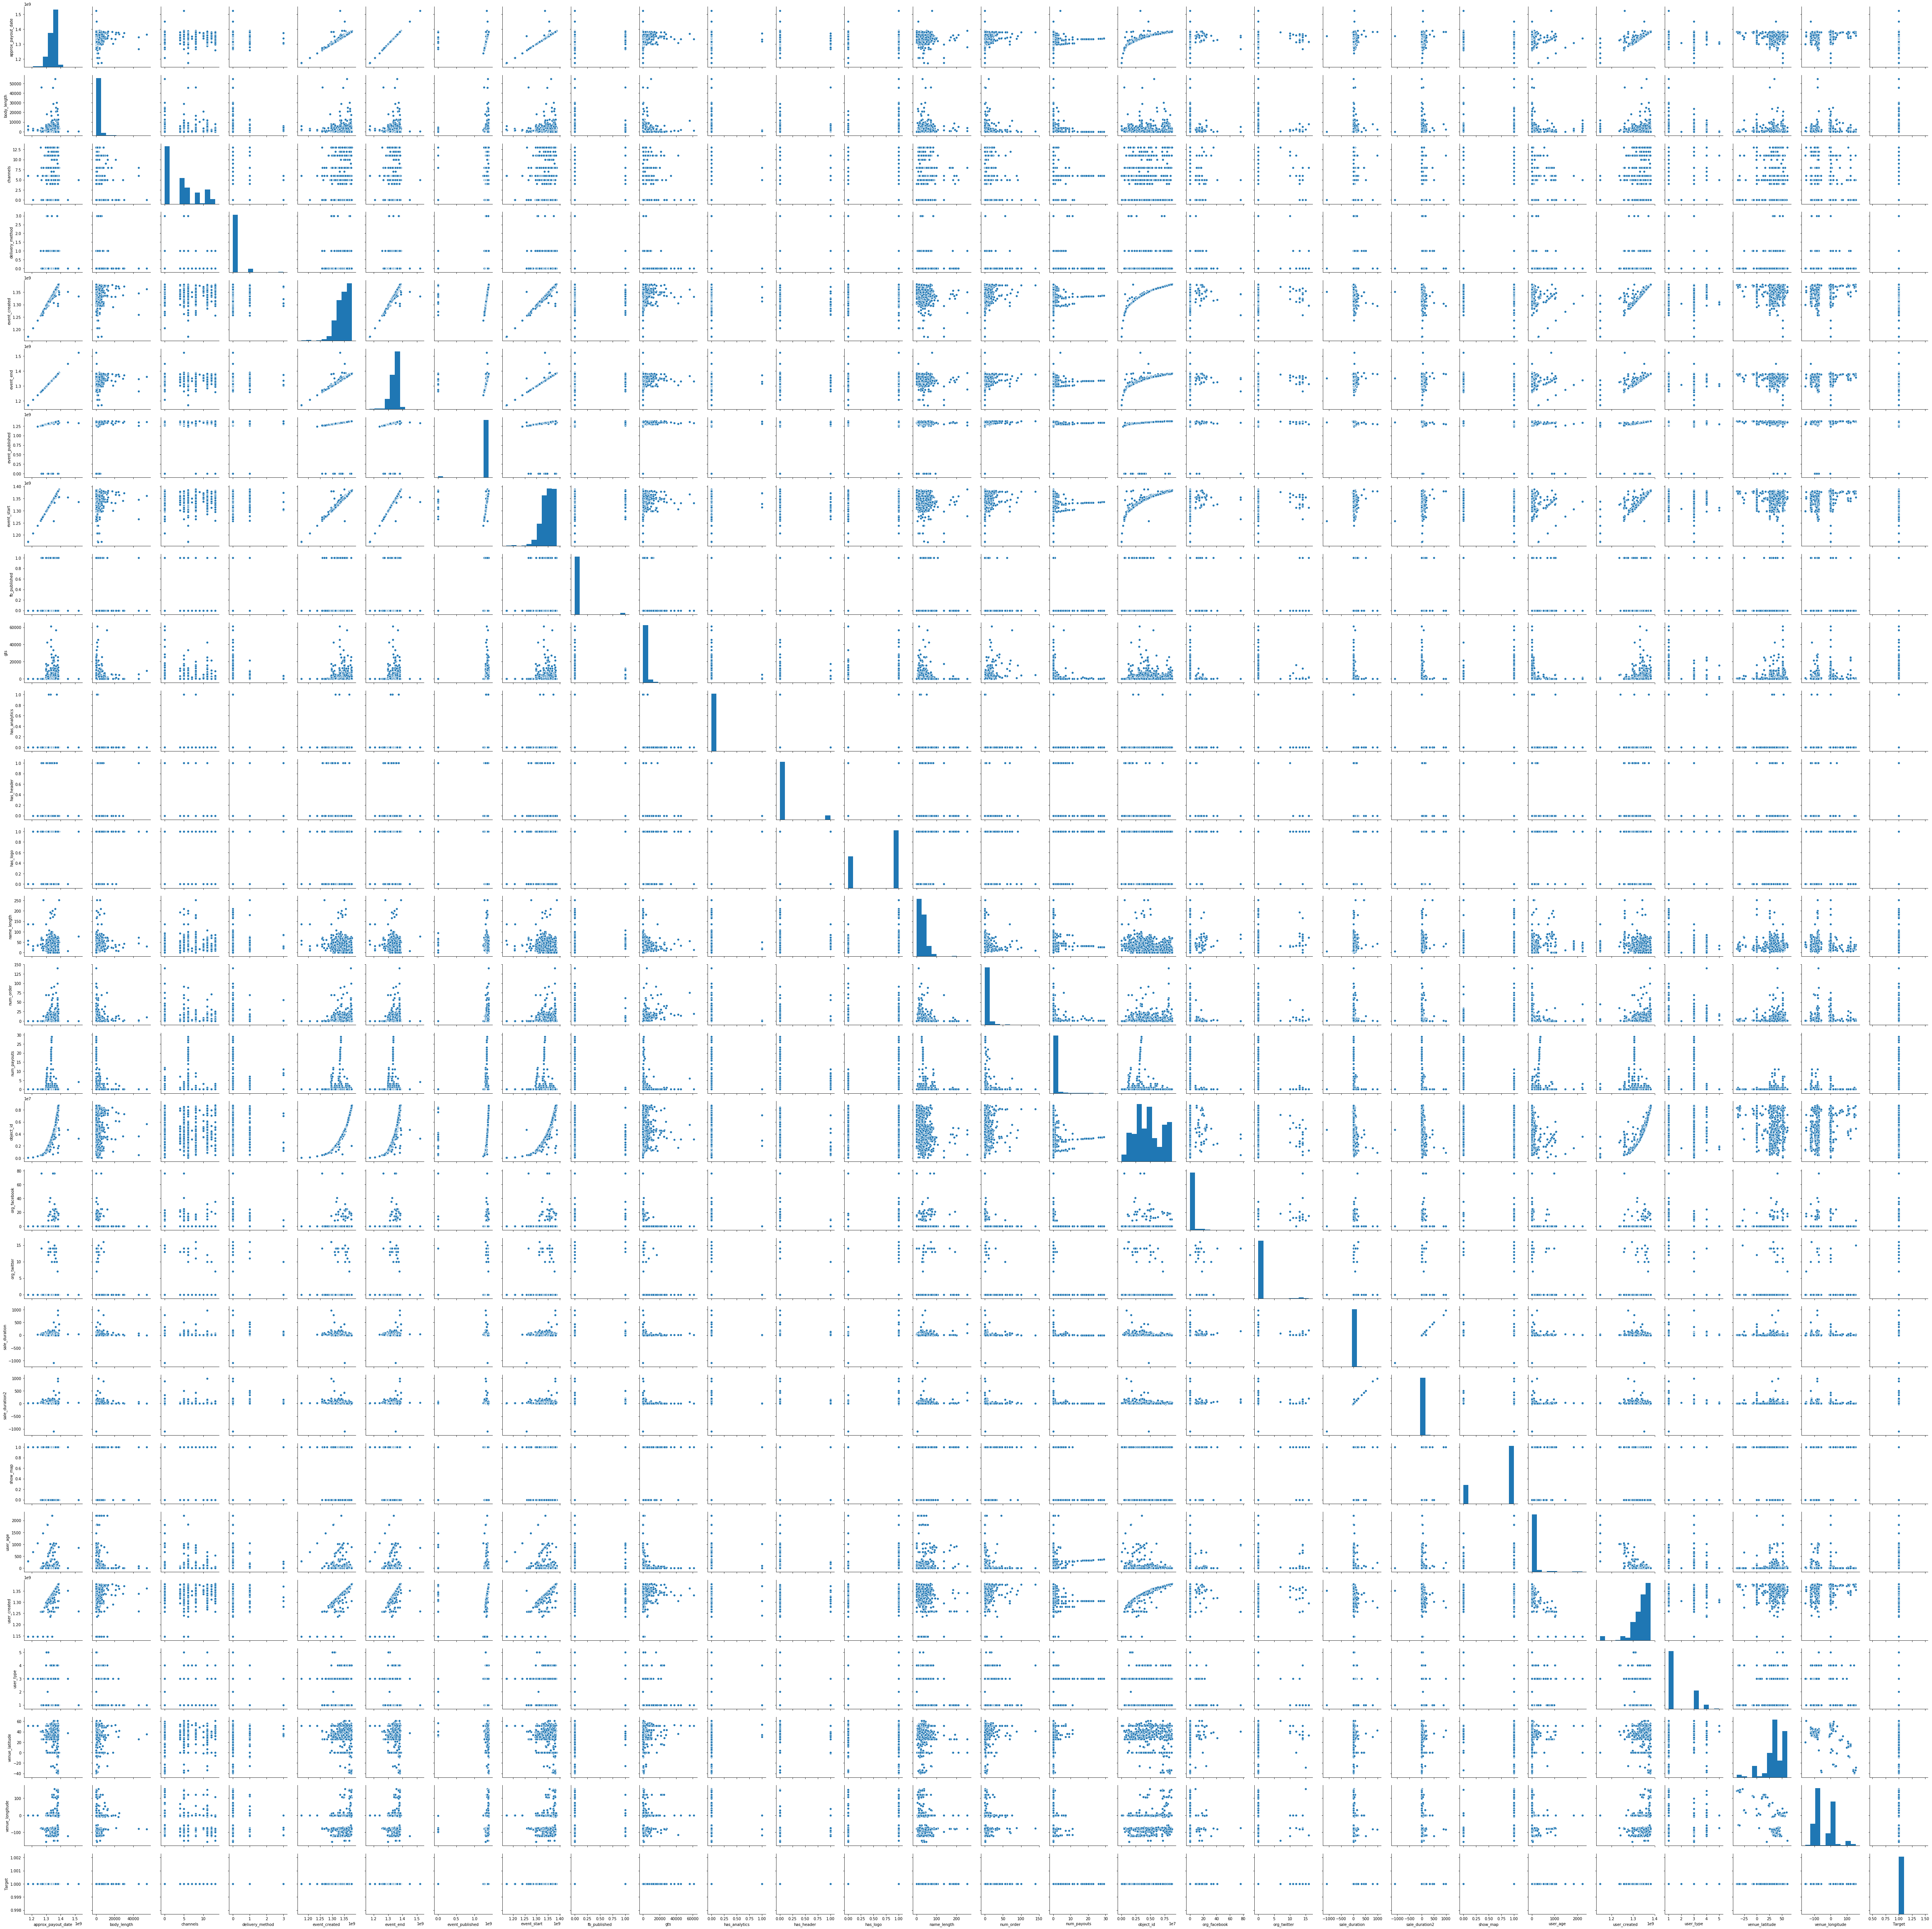

In [45]:
sns.pairplot(df[df['Target']==1])

In [99]:
df[df['Target']==1]['num_payouts'].unique()

array([ 0,  1, 11, 21,  2, 20,  6,  3,  7, 16, 17,  4, 29,  5,  9, 28, 22,
       26, 12, 14, 23, 27,  8, 18, 19])

In [100]:
low_payouts_df = df[df['num_payouts']<29]

In [103]:
low_payouts_df['Target'].value_counts()

0    10661
1     1289
Name: Target, dtype: int64

In [18]:
df['Target'].unique()

array([1, 0])

In [70]:
 for row in df['ticket_types'].tail(10):
        print (row)
        for r in row:
            print (type(r))
            for key,values in r.items():
                print (key,values)

[{'event_id': 5394728, 'cost': 60.43, 'availability': 1, 'quantity_total': 25, 'quantity_sold': 9}, {'event_id': 5394728, 'cost': 36.81, 'availability': 1, 'quantity_total': 25, 'quantity_sold': 0}, {'event_id': 5394728, 'cost': 235.26, 'availability': 1, 'quantity_total': 25, 'quantity_sold': 1}, {'event_id': 5394728, 'cost': 140.76, 'availability': 1, 'quantity_total': 25, 'quantity_sold': 0}, {'event_id': 5394728, 'cost': 93.51, 'availability': 1, 'quantity_total': 25, 'quantity_sold': 5}, {'event_id': 5394728, 'cost': 69.88, 'availability': 1, 'quantity_total': 25, 'quantity_sold': 0}, {'event_id': 5394728, 'cost': 282.51, 'availability': 1, 'quantity_total': 25, 'quantity_sold': 1}, {'event_id': 5394728, 'cost': 188.01, 'availability': 1, 'quantity_total': 25, 'quantity_sold': 0}]
<class 'dict'>
event_id 5394728
cost 60.43
availability 1
quantity_total 25
quantity_sold 9
<class 'dict'>
event_id 5394728
cost 36.81
availability 1
quantity_total 25
quantity_sold 0
<class 'dict'>
even

In [6]:
df_tail = df['Target'].tail(10)

In [78]:
fraud = df[df['Target']==1]

In [79]:
not_fraud = df[df['Target']==0]

In [87]:
def todatetime(df,columns=('event_created', 'event_end', 'event_published', 'event_start')):
    for c in columns:
        df[c]=pd.to_datetime(df[c],unit='s')
        

In [93]:
fraud[['event_created', 'event_end', 'event_published', 'event_start','sale_duration','sale_duration2']]

event_created   event_end  event_published  event_start  sale_duration  \
0         1262739706  1265630400     1.263110e+09   1265594400           29.0   
26        1299171416  1299175200     1.299171e+09   1299173400            0.0   
51        1317544696  1329033600     1.317545e+09   1329015600          132.0   
54        1311717051  1312329600     1.311721e+09   1312218000            6.0   
70        1316795942  1322463600     1.320698e+09   1322445600           20.0   
128       1330545234  1331521200     1.330547e+09   1331343000            9.0   
130       1331041029  1331106900     1.331041e+09   1331100000            0.0   
131       1331162405  1331532000     1.331163e+09   1331521200            4.0   
140       1332979005  1333087200     1.332979e+09   1333083600            1.0   
144       1333878951  1334448000     1.333880e+09   1334325600            5.0   
149       1335366629  1335364200     1.335605e+09   1335358800           -3.0   
161       1336338290  1337295600     1.336338e+09   1337284800           11.0   
177       1339477808  1339498800     1.339478e+09   1339491600            1.0   
181       1340649749  1341122400     1.340651e+09   1341111600            5.0   
183       1340679041  1340766000     1.340682e+09   1340755200            1.0   
187       1341189474  1354406400     1.341341e+09   1354395600          151.0   
202       1343446512  1343757600     1.343447e+09   1343502000            1.0   
206       1343909121  1343977200     1.343909e+09   1343966400            0.0   
212       1345486002  1353045600     1.345486e+09   1353034800           87.0   
219       1346730451  1348484400              NaN   1348416000            NaN   
248       1349979870  1353456000     1.349981e+09   1353445200           40.0   
250       1350330024  1351083600     1.350364e+09   1351058400            8.0   
259       1351206387  1354665600     1.351207e+09   1354654800           40.0   
262       1351607383  1351665600     1.351608e+09   1257109200        -1094.0   
263       1352372986  1352764800     1.352373e+09   1352750400            4.0   
272       1354084344  1355637600     1.354088e+09   1355626800           18.0   
275       1354522904  1386201600     1.354523e+09   1354568400            0.0   
289       1355785018  1359244800              NaN   1359234000            NaN   
296       1357753982  1360449000     1.357756e+09   1358629200           10.0   
307       1358706847  1359266400     1.358707e+09   1359255600            6.0   
...              ...         ...              ...          ...            ...   
14037     1304686221  1381246200     1.312808e+09   1381242600          792.0   
14041     1305807647  1305817200     1.305808e+09   1305815400            0.0   
14043     1307841629  1351468800     1.307842e+09   1351368000          504.0   
14044     1308601802  1308612600     1.308602e+09   1308610800            0.0   
14051     1310908751  1311462000     1.310999e+09   1311267600            3.0   
14054     1312323701  1312520400     1.312324e+09   1312506000            2.0   
14060     1313759686  1313888400     1.313760e+09   1313881200            1.0   
14073     1326003665  1342998000     1.326012e+09   1342728000          193.0   
14098     1326221736  1329264000     1.326236e+09   1329166800           34.0   
14114     1329071851  1330506000     1.329072e+09   1329537600            5.0   
14125     1330711807  1330819200     1.330712e+09   1330808400            1.0   
14128     1330864330  1330930800     1.330865e+09   1330916400            0.0   
14131     1330881173  1331463600     1.330881e+09   1331438400            6.0   
14140     1333379197  1333778400     1.333382e+09   1333764000            4.0   
14149     1335108856  1335963600     1.335110e+09   1335927600            9.0   
14164     1336414902  1337225400     1.336416e+09   1337214600            9.0   
14187     1340114281  1343602800     1.340115e+09   1343505600           39.0   
14203     1342791861  1346281200     0

In [89]:
time_town(timmy)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
timmy[['event_created', 'event_end', 'event_published', 'event_start','Target']]

event_created           event_end     event_published  \
0  2010-01-06 01:01:46 2010-02-08 12:00:00 2010-01-10 07:50:38   
26 2011-03-03 16:56:56 2011-03-03 18:00:00 2011-03-03 16:58:18   
51 2011-10-02 08:38:16 2012-02-12 08:00:00 2011-10-02 08:47:31   
54 2011-07-26 21:50:51 2011-08-03 00:00:00 2011-07-26 22:51:56   
70 2011-09-23 16:39:02 2011-11-28 07:00:00 2011-11-07 20:31:34   

           event_start  Target  
0  2010-02-08 02:00:00       1  
26 2011-03-03 17:30:00       1  
51 2012-02-12 03:00:00       1  
54 2011-08-01 17:00:00       1  
70 2011-11-28 02:00:00       1

In [88]:
timmy = fraud[:5]

In [80]:
df[['event_created', 'event_end', 'event_published', 'event_start']]

event_created   event_end  event_published  event_start
0         1262739706  1265630400     1.263110e+09   1265594400
1         1293832670  1296288000     1.293833e+09   1296255600
2         1291090956  1295740800     1.291092e+09   1295713800
3         1360681570  1388534400     1.360683e+09   1360702800
4         1291994666  1297468800     1.291995e+09   1297440000
5         1294421810  1300064400     1.294422e+09   1300053600
6         1294425018  1297477800     1.294425e+09   1297468800
7         1294427837  1296277200     1.294428e+09   1296271800
8         1294428122  1297753200     1.294880e+09   1297737000
9         1294428286  1296882000     1.294428e+09   1296876600
10        1294428969  1296072000     1.294682e+09   1296060300
11        1295297252  1297638000     1.295297e+09   1297630800
12        1296128276  1302663600     1.296478e+09   1302654600
13        1296068930  1301457600     1.296069e+09   1301446800
14        1296069679  1300510800     1.296071e+09   1300500000
15        1296774952  1302062400     1.297216e+09   1302055200
16        1296775079  1299646800     1.296873e+09   1299639600
17        1297703790  1299391200     1.297706e+09   1299384000
18        1297481644  1313449200     1.297482e+09   1313424000
19        1308258347  1312704000     1.311041e+09   1312686000
20        1297681049  1301896800     1.298391e+09   1301709600
21        1297528534  1299870000     1.297529e+09   1299866400
22        1298322945  1300046400     1.298323e+09   1299949200
23        1299005166  1302030000     1.299005e+09   1302019200
24        1299005303  1301628600     1.299264e+09   1301619600
25        1299010553  1303002000     1.299012e+09   1302991200
26        1299171416  1299175200     1.299171e+09   1299173400
27        1300288420  1303356600     1.300397e+09   1303347600
28        1300289273  1309042800     1.300290e+09   1308927600
29        1303250638  1304672400     1.303274e+09   1304650800
...              ...         ...              ...          ...
14307     1357944700  1359790200     1.357945e+09   1359784800
14308     1358155952  1363150800     1.358552e+09   1363140000
14309     1358295377  1369785600     1.358296e+09   1369666800
14310     1358296886  1360121400     1.358301e+09   1360117800
14311     1359173705  1361664000     1.359174e+09   1361638800
14312     1371181980  1375056000     1.371244e+09   1374937200
14313     1358549420  1358632800     1.358550e+09   1358571600
14314     1358549473  1361982600     1.358550e+09   1360773000
14315     1358552050  1362951900     1.358552e+09   1362946500
14316     1358948648  1359878400     1.359033e+09   1359860400
14317     1358948926  1361952000     1.358965e+09   1361941200
14318     1358975278  1359352800     1.358976e+09   1359342000
14319     1358976112  1366167600     1.358976e+09   1361937600
14320     1359114738  1360735200     1.359120e+09   1360726200
14321     1359229286  1360818000     1.359229e+09   1360809000
14322     1359233231  1370728800     1.365381e+09   1370707200
14323     1359233775  1360719000     1.360092e+09   1360713600
14324     1359404438  1361712600     1.359495e+09   1361689200
14325     1359415821  1359617400     1.359418e+09   1359604800
14326     1359549510  1367038800     1.359550e+09   1367031600
14327     1359746862  1369351800     1.359748e+09   1368631800
14328     1359809733  1368727200     1.359810e+09   1368723600
14329     1359809804  1371578400     1.359810e+09   1371574800
14330     1359824184  1362895200     1.360006e+09   1362880800
14331     1364417805  1370304000     1.364418e+09   1370289600
14332     1360297993  1361257200     1.360299e+09   1361232000
14333     1360367042  1365134400     1.360370e+09   1365123600
14334     1360600330  1368349200     1.361337e+09   1368327600
14335     1360376285  1360929600     1.360377e+09   1360890000
14336     1360686846  1362888000     1.360687e+09   1360740600

[14337 rows x 4 columns]

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


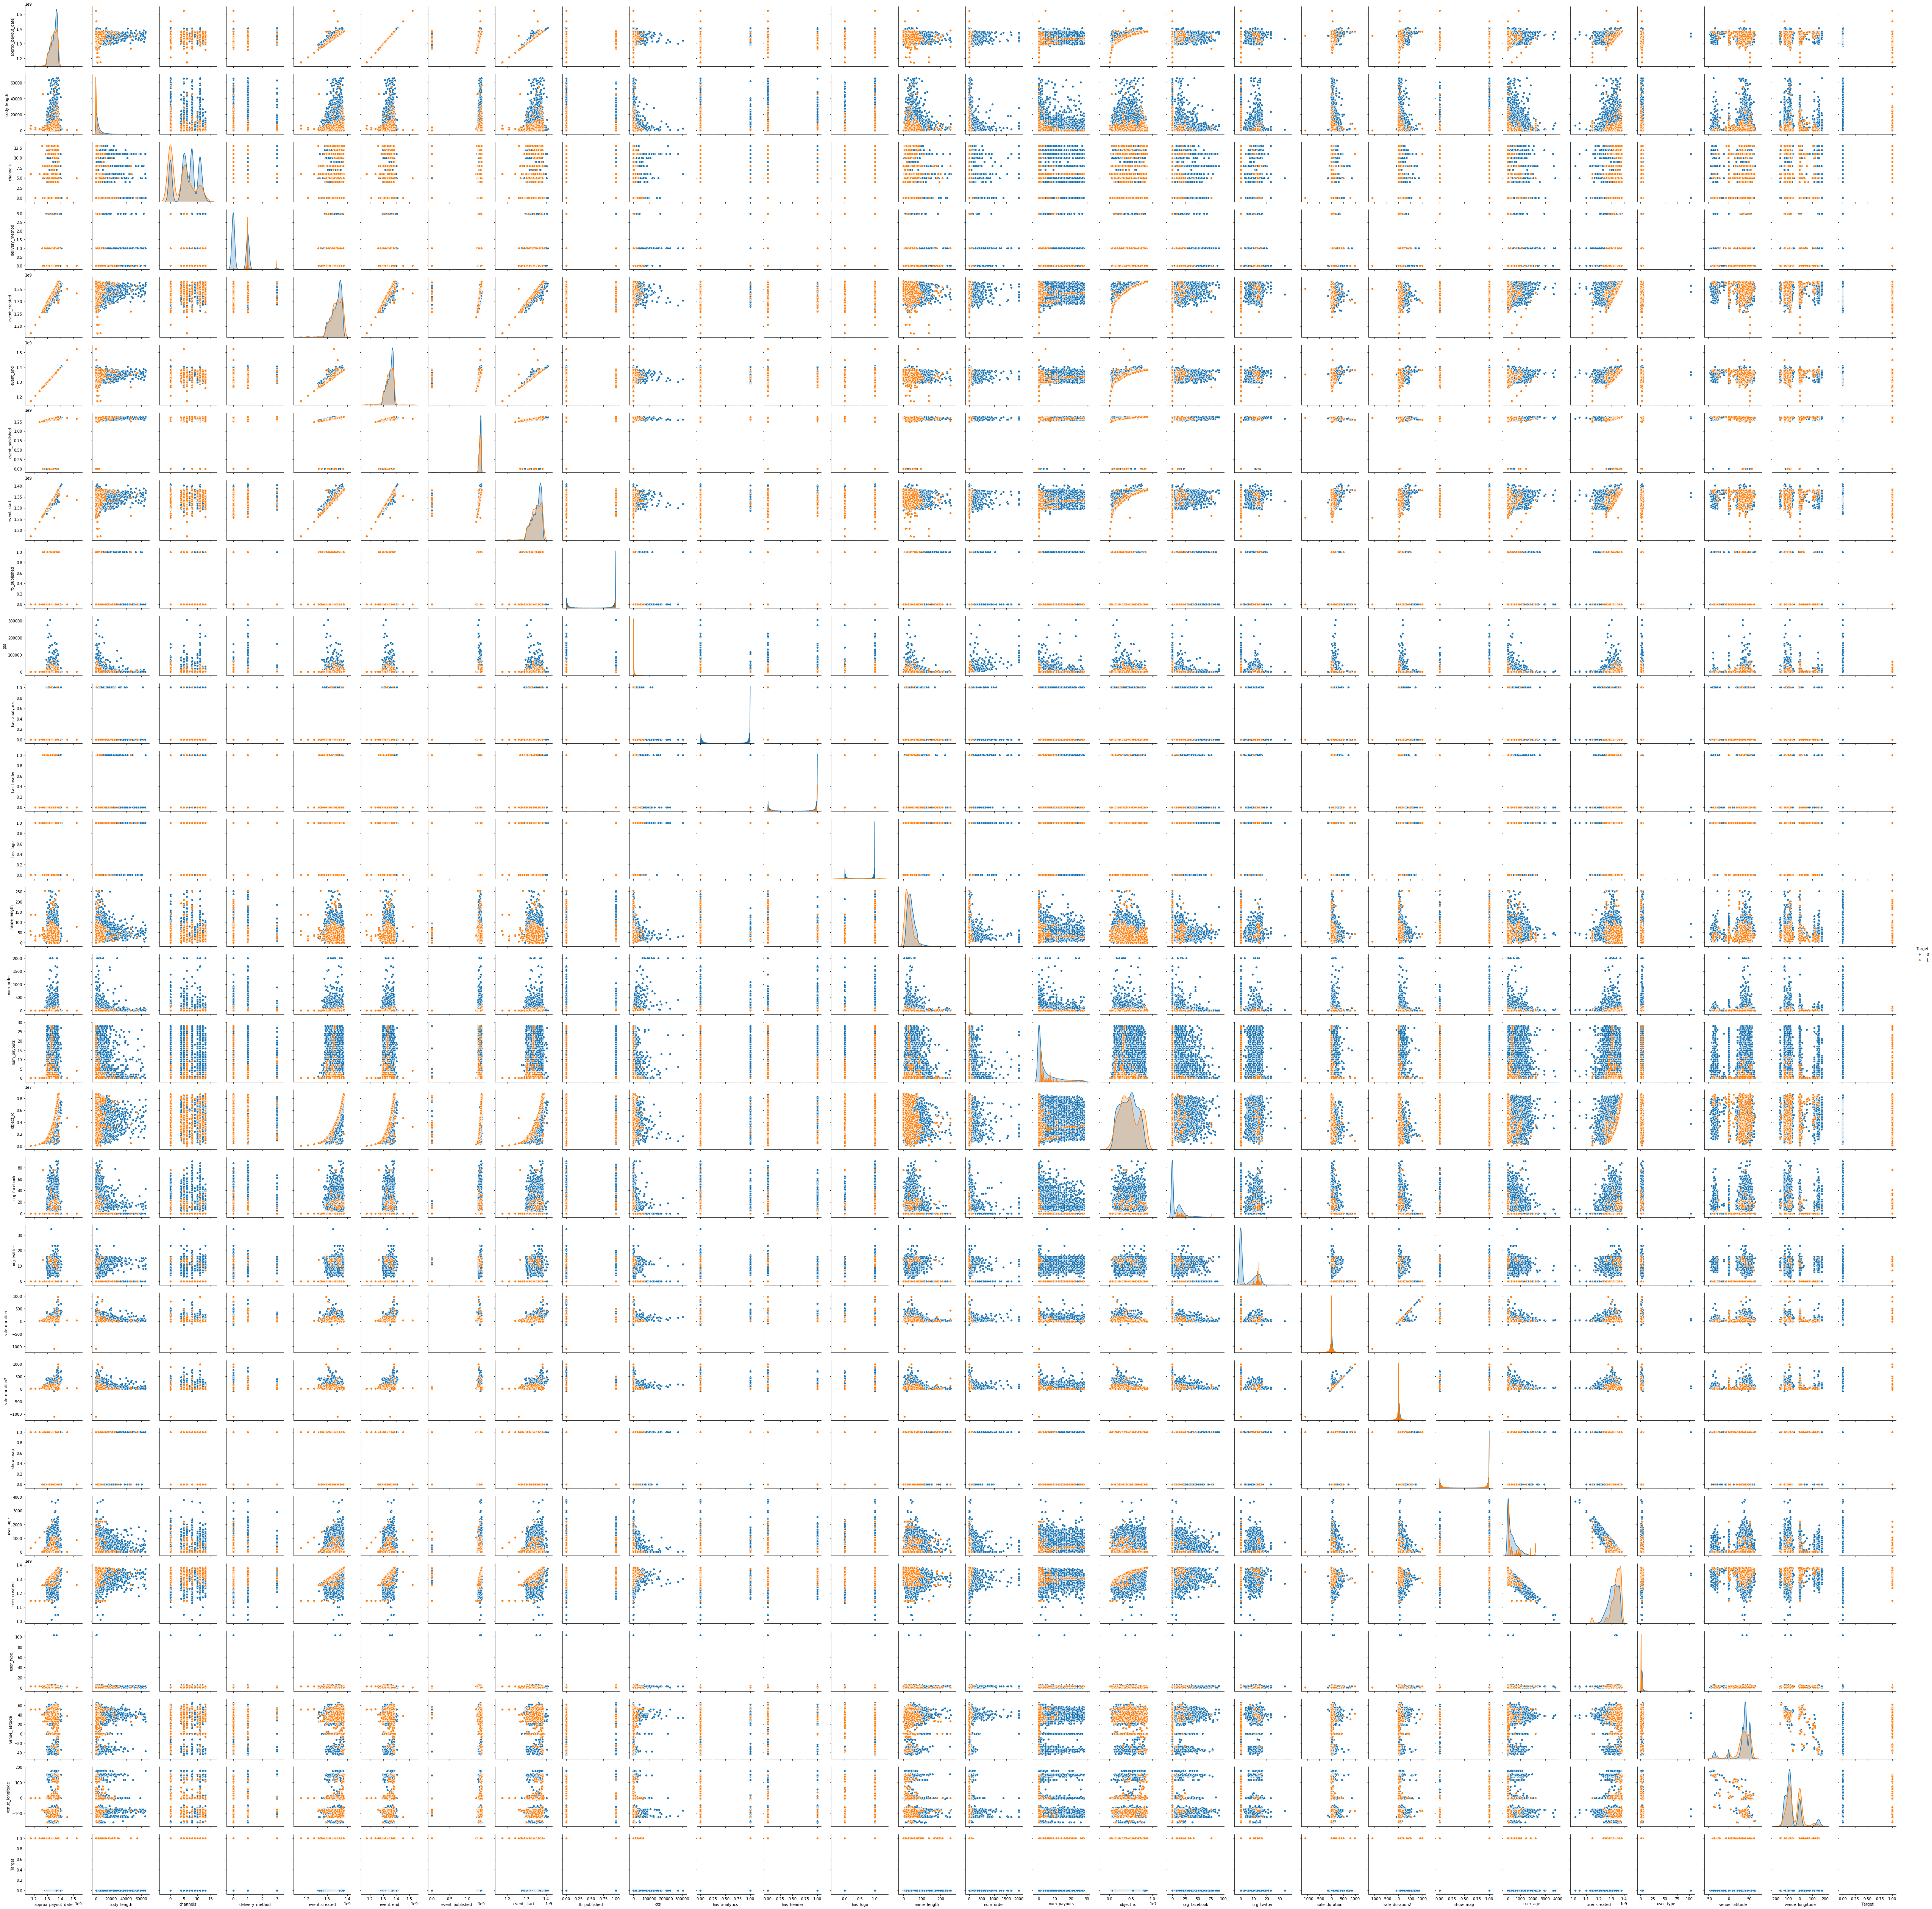

In [105]:
sns.pairplot(low_payouts_df,hue='Target')

In [110]:
table = pd.pivot_table(low_payouts_df,index='venue_state',columns=['Target'])

In [108]:
table

approx_payout_date                 body_length  \
Target                                        0             1             0   
venue_state                                                                   
                                   1.345356e+09  1.347414e+09   4651.128696   
AB                                 1.364821e+09           NaN   3663.826087   
ACT                                1.357079e+09           NaN   3898.200000   
AK                                 1.353963e+09  1.362252e+09   5468.333333   
AL                                 1.357835e+09  1.353820e+09   2173.268293   
ALAKSA                             1.361491e+09           NaN   2565.000000   
AR                                 1.353267e+09  1.338053e+09   3153.312500   
AUSTRALIA                          1.372982e+09           NaN   4135.000000   
AZ                                 1.348432e+09  1.367563e+09   3124.150538   
Aberdeen City                      1.363914e+09           NaN   5162.000000   
Abu Dhabi                                   NaN  1.374854e+09           NaN   
Ad Dawhah                          1.333688e+09           NaN    322.000000   
Aguada                             1.377292e+09           NaN    273.000000   
Alberta                            1.338824e+09           NaN   4310.350000   
Algiers                                     NaN  1.367914e+09           NaN   
Antrim                             1.351656e+09           NaN   2228.000000   
Antwerpen                          1.359378e+09           NaN   5257.500000   
Auckland                           1.364091e+09           NaN   6502.807692   
Australian Capital Territory       1.349675e+09           NaN   2046.500000   
Auvergne                           1.380175e+09           NaN      0.000000   
BA                                          NaN  1.378562e+09           NaN   
BC                                 1.365044e+09           NaN   3323.305263   
BW                                 1.360038e+09           NaN   2355.000000   
BY                                 1.371514e+09           NaN  11746.000000   
Bali                               1.372750e+09  1.379590e+09   1876.500000   
Bath And North East Somerset       1.319335e+09           NaN   1604.000000   
Bath and North East Somerset       1.359377e+09           NaN   1088.000000   
Bay Of Plenty                      1.370133e+09           NaN   6089.000000   
Bayern                             1.356775e+09           NaN    617.500000   
Bedfordshire                                NaN  1.325635e+09           NaN   
...                                         ...           ...           ...   
Waikato                            1.380996e+09           NaN  12651.000000   
Waitakere                          1.369624e+09           NaN   1268.000000   
Wales                              1.371151e+09           NaN   8271.666667   
Walloon Region                     1.369197e+09           NaN    932.000000   
Warks                                       NaN  1.356954e+09           NaN   
Warrington                         1.322525e+09           NaN   3711.000000   
Warszawa                           1.340060e+09           NaN  13723.000000   
Warwickshire                       1.368740e+09  1.349827e+09   3368.000000   
Waterford                          1.362911e+09           NaN   2689.000000   
Wellington                         1.366221e+09           NaN   3901.666667   
West Berkshire                     1.345463e+09           NaN   1434.500000   
West Java                                   NaN  1.374161e+09           NaN   
West Midlands                      1.354320e+09           NaN    907.000000   
West Mids                          1.367688e+09  1.344082e+09   4747.000000   
West Sussex                        1.332511e+09           NaN   4102.000000   
West York                          1.364575e+09           NaN   3372.733333   
West Yorkshire                     1.335200e+09           NaN   4383.000000   


In [122]:
df['states']=df[df['venue_state']=='']='None'

array(['None'], dtype=object)

In [139]:
from pymongo import MongoClient

In [140]:
client = MongoClient()
db = client.test
coll = db.dataset

In [28]:
def get_ticketsales_total(df):
    # Input is a dataframe
    # Output is a list
    ticketsales_total = [] # Create new list to add tickets sold
    # Itterate through each event
    for row in df['ticket_types']:
        sales = []
        # Get the quantity sold for each price level
        for price in row:
            sales.append(price['cost']*price['quantity_total'])
        # Add tickets sold to the list
        if len(sales) > 0:
            ticketsales_total.append(sum(sales))
        # If there are no events make tickets sold = 0
        else:
            ticketsales_total.append(0)
    # returns list of number of tickets sold
    return ticketsales_total

In [65]:
def get_sold_ticketsales_total(df):
    # Input is a dataframe
    # Output is a list
    ticketsales_total = [] # Create new list to add tickets sold
    # Itterate through each event
    for row in df['ticket_types']:
        sales = []
        # Get the quantity sold for each price level
        for price in row:
            sales.append(price['cost']*price['quantity_sold'])
        # Add tickets sold to the list
        if len(sales) > 0:
            ticketsales_total.append(sum(sales))
        # If there are no events make tickets sold = 0
        else:
            ticketsales_total.append(0)
    # returns list of number of tickets sold
    return ticketsales_total

In [49]:
import numpy as np
print (np.max(get_ticketsales_total(df[df["Target"]==0])))

1163500000.0


In [67]:
df["actual_ticket_sales"] = get_sold_ticketsales_total(df)

In [71]:
df['actual_ticket_sales'].describe()


count     14337.000000
mean       2611.657684
std       12919.591558
min           0.000000
25%          75.000000
50%         345.000000
75%        1356.120000
max      814477.960000
Name: actual_ticket_sales, dtype: float64

In [75]:
import matplotlib.pyplot as plt


(array([1.2119e+04, 4.3700e+02, 1.7000e+02, 7.4000e+01, 5.8000e+01,
        3.3000e+01, 1.8000e+01, 1.9000e+01, 7.0000e+00, 1.2000e+01,
        6.0000e+00, 6.0000e+00, 4.0000e+00, 5.0000e+00, 4.0000e+00,
        2.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

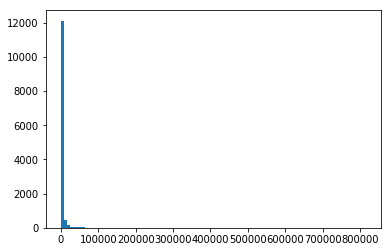

In [81]:
plt.hist(df[df['actual_ticket_sales']>0]['actual_ticket_sales'],bins=100)